In [1]:
%matplotlib inline

## This is the notebook source material to create the course slides. View the final presentation [here](https://olafwied.github.io/AdvBayes-Course/)

# Scalable Methods for Bayesian Machine Learning and Probabilistic Inference
## And other advanced topics

## © Olaf Wied 2018

Note that this is intended for an advanced audience. Background in machine learning and deep learning, linear algebra and probability theory is recommended.

© Olaf Wied 2018
## Scalable Methods for Bayesian Machine Learning and Probabilistic Inference

# Outline
### [Part I - Short Recap of Bayesian Basics](#/2)
- Bayes Theorem
- Bayesian Inference
- Generative vs Discriminative Models
- Bayesian Statistics
- Priors
- Frequentist Statistics

© Olaf Wied 2018

### [Part II - Latent Variable Models and the EM Algorithm](#/11)

- Kullback-Leibler Divergence
- Latent Variable Models
- Example: Mixture Models
- EM Algorithm, E-Step and M-Step
- Large Scale EM
- Variational and Stochastic Variational Inference

© Olaf Wied 2018
### Part III - Scalable Methods for Bayesian Learning
- Probabilistic PCA
- Variational Autoencoders
- The Reparametrization Trick
- Generative Models and Adverserial Learning

© Olaf Wied 2018
### Part IV - Gaussian Processes and Optimization
- Gaussian Processes
- Bayesian Optimization
- MCMC

© Olaf Wied 2018
### Part V - Bayesian Deep Learning
- Bayesian Neural Networks
- Variational Dropout
- Sparse Bayesian Networks

© Olaf Wied 2018
# Part I - Recap of Bayesian ML

© Olaf Wied 2018 

Part I - Recap of Bayesian ML
# Bayes' Theorem


$$p(y|x) = \frac{p(x|y)p(y)}{p(x)} = \frac{p(x|y)p(y)}{\int{p(x|y)p(y) dy}}$$

or in words 

$$Posterior = \frac{Likelihood \cdot Prior}{Evidence}$$

© Olaf Wied 2018 

Part I - Recap of Bayesian ML
# The Inference Problem

#### Problem
Given data $X = (x_1,\ldots,x_n)$ (iid) from $p(x|\theta)$, infere $\theta$.

#### MLE (Maximum Likelihood Estimation)
$$\theta_{ML} = \arg \max \prod_{i=1}^n{p(x_i|\theta)} = \arg \max \sum_{i=1}^n{\log p(x_i|\theta)}$$

© Olaf Wied 2018 

Part I - Recap of Bayesian ML
# The Inference Problem

#### Problem
Given data $X = (x_1,\ldots,x_n)$ (iid) from $p(x|\theta)$, infere $\theta$.

#### Bayesian Inference
Encode uncertainty about $\theta$ in terms of a **prior distribution $p(\theta)$** and apply Bayes' theorem:

$$p(\theta|X) = \frac{\prod_{i=1}^n p(x_i|\theta)p(\theta)}{\int \prod_{i=1}^n p(x_i|\theta)p(\theta) d\theta}$$

Bayesian Inference provides a full *posterior* distribution over $\theta$. **Computing the mode is called "Poor Man's Bayes" and gives the MAP (Maximum A Posteriori) estimate.**

© Olaf Wied 2018 

Part I - Recap of Bayesian ML
# The Inference Problem

#### Bayesian Inference
Note that the evidence does not depend on $\theta$ and therefore is irrelevant for computing the MAP estimate: $$\theta_{MAP} = \arg \max p(x|\theta)p(\theta) = \arg \max \{\log p(x|\theta) + \log p(\theta) \}$$

**Note further that, while the likelihood depends exponentially on $n$, the prior remains constant. Hence, eventually, the data will *overwhelm the prior* and the MAP will converge towards the MLE.** Likewise, the posterior will become peaked around the MAP estimate.

It is often the case, that when $n$ grows, frequentist and Bayesian perspective will yield the same result! They do not contradict each other. You should have both tools in your toolbox.

© Olaf Wied 2018 

Part I - Recap of Bayesian ML
# Note on MAP estimation

The MAP is a popular point estimate because calculating the mode (other than the mean or median for example) is an **optimization problem**, for which we have many efficient algorithms available. However, the are **drawbacks** and I want to point out a few as a reference:

- Mean or median often summarize the posterior distribution better than the mode.
- Point estimates lack a measure of uncertainty.
- This can lead to overfitting.
- The MAP estimate depends on the parametrization of the distribution: Let $y=f(x)$, then $\bar x = \arg \max p_x(x)$ and $\bar y = \arg \max p_{y}(y)$ does not imply $\bar y = f(\bar x)$.

(See, for example, K.P. Murphy: Machine Learning, ch. 5.2.1)

© Olaf Wied 2018 

Part I - Recap of Bayesian ML
# Generative vs Discriminative Models

#### Generative Models
Model the joint distribution $p(x,y,\theta) = p(x,y|\theta)p(\theta)$. This means that once we have a trained model we can generate new data $(x,y)$. 

Examples are *Naive Bayes* or *Generative Adversarial Networks (GANs)*.

Generative models can be difficult to train, because the feature space $X$ is usually much more complicated than the label space $Y$, e.g.

- In image classification, the space of all images $X$ is much more complicated than the $Y$ space of image classes.
- However, there are other examples. In machine translation $X$ and $Y$ space are equal.

© Olaf Wied 2018 

Part I - Recap of Bayesian ML
# Generative vs Discriminative Models

#### Discriminative Models
If we directly model the class posterior, e.g. $p(y=c, \theta |x)$, we do not need to know about the distribution of the observed variables. This is called a discriminant classifier. We usually assume that the prior over the model parameters $\theta$ does not depend on $X$, thus

$$p(y,\theta | x) = p(y | x,\theta)p(\theta)$$

A basic example is *Logistic Regression*.

© Olaf Wied 2018 

Part I - Recap of Bayesian ML
# Generative vs Discriminative Models

Both have advantages and disadvantages! Again, have both in your toolbox.

Generative Classifiers impose more strict assumptions on the model. If the assumptions are correct, generatives models can be trained **faster and with less data**. But, joint distributions are harder to estimate and lead to uncertainty, therefore **discriminative models are often more accurate**. 

Models like Naive Bayes can be trained extremely easily by simply counting. However, the strong assumptions are often not met and lead to ill-calibrated probability outputs.

Generative models, however, have the advantage to be able to **deal with missing data** and can be extended more easily to semi-supervised learning. (See, for example, B. Marlin (2008): Missing Data Problems in Machine Learning)

Discriminative models, since they do not care about the distribution of the data, have the advantage that they allow arbitrary **feature preprocessing**. 

© Olaf Wied 2018 

Part I - Recap of Bayesian ML
# Features of Bayesian Statistics

#### Sequential Learning
Bayesian inference can be done sequentially or in batches which makes it a great candidate for **online or minibatch learning**, the preferred method when dealing with large datasets.

- Define Prior

```R
Posterior <- Likelihood x Prior
(New) Prior <- Posterior
```

- Observe new data

```R
Update Likelihood
(New) Posterior <- Likelihood x (New) Prior
```

- Repeat


© Olaf Wied 2018 

Part I - Recap of Bayesian ML
# Features of Bayesian Statistics

#### Bayesian Inference as Ensemble Learning

Suppose we work with training data $(X_{tr}, Y_{tr})$ and a discriminator $p(Y,\theta | X)$.

Training the model consists of calculating 

$$p(\theta | X_{tr}, Y_{tr}) = \frac{p(Y_{tr}|X_{tr},\theta)p(\theta)}{\int p(Y_{tr}|X_{tr},\theta)p(\theta)d\theta}$$

This is an **ensemble** of models over the distribution of $\theta$.

At test time, we perform **model averageing** via the posterior over $\theta$:

$$p(y_{test}|x_{test},X_{tr},Y_{tr}) = \int p(y_{test}|x_{test},\theta)p(\theta|X_{tr},Y_{tr})d\theta$$

© Olaf Wied 2018 

Part I - Recap of Bayesian ML
# Features of Bayesian Statistics

#### Intractability
Model averageing outperforms a single model in the $\theta$ family (e.g. the MAP model $\arg \max_{\theta} p(\theta|X,Y)$ or a model found through cross-validation) since the full posterior contains all information about $X$ and $Y$ that the model can detect.

However, the **integrals** that appear during training and test are usually **intractable**!

There is one family of exception: conjugate priors! We will talk more about these in the next segment (to the right).

For now, remember that distributions $p(y)$ and $p(x|y)$ are **conjugate** iff $p(y|x)$ belongs to the same (parametric) family as $p(y)$. If so, the formulas above will have **closed-form solutions**!

© Olaf Wied 2018 

Part I - Recap of Bayesian ML
# Features of Bayesian Statistics

#### Intractability
For models where this is intractable, approximate methods exist based on sampling methods like MCMC or variational apprxoimations.

Variational inference is based on the idea to pick a tractable family of approximations to the posterior and then pick the one that is closest to the true posterior, e.g. by minimizing the Kulback-Leibler distance between the two.

We will discuss these methods and scalable versions of them in following chapters.

© Olaf Wied 2018 

Part I - Recap of Bayesian ML
# Features of Bayesian Statistics

#### Model Selection, Overfitting and Regularization

As mentioned, for large datasets MAP estimates and full Bayesian posteriors lead to similar results, but they can be very different for small or ambiguous datasets. In such a case, the posterior will be vague, which leads to a very broad (or uninformative) predictive distribution. However, just using the MAP model (or *plug-in aproximation*) is simple, but can underestimate the uncertainty. The Bayesian approach has the nice property that it **starts out broad** and becomes narrower as we become more certain or see more data. This coincides better with our intuitive understanding. Starting out broadly can prevent overfitting!

The Bayesian approach also has the advantage that it can **incorporate regularization** within the Bayesian framework by prescriping appropriate priors, e.g.

- Lasso and Ridge Regression, for example, can be seen as specially cases with Laplace and Gaussian priors.
- In models based on count values, like Naive Bayes for word counts, priors can naturally prevent Black-Swan type paradoxes when the model encounters a previously unseen word (which can otherwise lead to zero probabilities)

© Olaf Wied 2018 

Part I - Recap of Bayesian ML
# Features of Bayesian Statistics

#### Scalability
Scalability has traditionally been an issue for Bayesian methods. However, tools have emerged that make variational and MCMC inference scalable. 

We will present some of these in the following chapters.


© Olaf Wied 2018 

Part I - Recap of Bayesian ML
# Priors

One hotly debated issue of Bayesian statistics is the use of priors. For Bayesians this is necessary because nobody operates in a vacuum. However, there are some ways to reduce the impact of one's prior assumptions, e.g. using **uninformative priors**.

**Conjugate priors** simplify computations and are often easy to interpret. As a reference, we provide the standard example of the **beta-binomial model**, which models the **probability to see heads in a series of coin flips**. Let $X_i \sim Ber(\theta), \theta \in [0,1]$

- **Likelihood**: $p(X|\theta) = \theta^{N_{head}}(1-\theta)^{N_{tail}}$, with $N_{head} \sim Bin(N_{head}+N_{tail}, \theta)$ (the binomial distribution)

 - The **conjugate prior** of the Bernoulli distribution is the Beta distribution
  - $p(\theta) \propto \theta^{a-1}(1-\theta)^{b-1} \propto Beta(\theta|a,b)$, note that $a$ and $b$ are called hyper-parameters
  - If we have no prior knowledge of $\theta$ we can choose the uniform distribution which is given via $Beta(\theta|1,1)$ (see plot below). This is a way to implement an **uninformative prior** (more later).

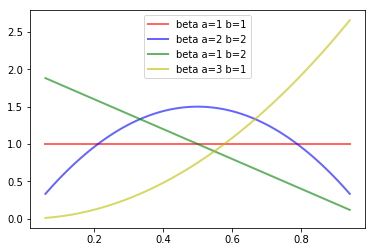

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
fig, ax = plt.subplots(1, 1)
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
ax.plot(x, beta.pdf(x, 1, 1),
       'r-', lw=2, alpha=0.6, label='beta a=1 b=1')
ax.plot(x, beta.pdf(x, 2, 2),
       'b-', lw=2, alpha=0.6, label='beta a=2 b=2')
ax.plot(x, beta.pdf(x, 1, 2),
       'g-', lw=2, alpha=0.6, label='beta a=1 b=2')
ax.plot(x, beta.pdf(x, 3, 1),
       'y-', lw=2, alpha=0.6, label='beta a=3 b=1')
ax.legend()
plt.show()

© Olaf Wied 2018 

Part I - Recap of Bayesian ML
# Priors

- Likelihood: $p(X|\theta) = \theta^{N_{head}}(1-\theta)^{N_{tail}}$, with $N_{head} \sim Bin(N_{head}+N_{tail}, \theta)$
- Conjugate prior: $p(\theta) \propto Beta(\theta|a,b)$
 
- **Posterior**: Multiplying likelihood and prior amounts to adding the exponents and yields $\propto Beta(\theta|N_{head}+a, N_{tail}+b)$

The hyper-parameters of the prior, $a$ and $b$, are therefore called **pseduo-counts**. The total strength of the prior is determined by the sum of pseduo-heads and pseudo-tails $a+b$.

We can see, again, how Bayesian inference works well sequentially. Updating the posterior is simply adding the new counts of heads and tails to the prior counts.

Note that priors need not necessarily be **proper** distributions (i.e. integrate to 1). This is possible as long as the posterior is proper!

© Olaf Wied 2018 

Part I - Recap of Bayesian ML
# Priors
#### Jeffreys prior

**Jeffreys priors** are a general purpose technique to design **uninformative** priors. The key insight behind Jeffreys priors is that uninformative priors should be invariant under reparametrization. One can show that this can be achieved when the prior is proportional to the square root of the determinant of the **Fisher information**:

$$ p(\theta) \propto \sqrt{\det \mathcal{I}(\theta)} $$

Note that the Fisher information is not the only choice with this property. Also, remember that Jeffreys priors can be improper. For example, the Jeffreys prior for the Gaussian mean parameter $\mu$ (with fixed standard deviation) is $1$ and independent of $\mu$.

© Olaf Wied 2018 

Part I - Recap of Bayesian ML
# Priors
#### Jeffreys prior

Let's revisit the example of the beta-binomial model where we previously suggested a uniform, or $Beta(1,1)$, distribution over $[0,1]$ as an uninformative prior.

We will show that the Jeffreys prior for $X \sim Ber(\theta)$ is actually $Beta(\frac{1}{2},\frac{1}{2})$:

© Olaf Wied 2018 

Part I - Recap of Bayesian ML
# Priors
#### Jeffreys prior
The log-likelihood is $p(X|\theta) = X\log\theta + (1-X)\log(1-\theta)$ with derivative $\frac{X}{\theta}-\frac{1-X}{1-\theta}$.
The second derivative is $J(\theta) = -\frac{X}{\theta^2}-\frac{1-X}{(1-\theta)^2}$.

The Fisher information is then 

$$\mathcal{I}(\theta) = \mathbb{E} \left[ -J(\theta|X) \mid X\sim\theta\right] = \frac{\theta}{\theta^2} + \frac{1-\theta}{(1-\theta)^2} = \frac{1}{\theta(1-\theta)}$$

and, hence, Jeffreys prior is 

$$p(\theta) \propto \frac{1}{\sqrt{\theta(1-\theta)}} \propto Beta(\frac{1}{2},\frac{1}{2})$$

© Olaf Wied 2018 

Part I - Recap of Bayesian ML
# Priors

#### Robust Priors and Mixtures of Conjugate Priors
If we have prior assumptions but are not very confident in them, it makes sense to use **robust priors** which have heavy tails and are less peaked around the prior mean! Since they can be computationally disadvantageous, one can resort to **mixtures of conjugate priors** (which are again conjugate) by introducing a latent mixture variable to approximate a desired distribution.

In our beta-binomial model, for example, we could introduce a prior 

$$p(\theta) = \frac{1}{2} \cdot Beta(\theta|10,10) + \frac{1}{2} \cdot Beta(\theta|20,10)$$

This would allow us to model a situtation where we believe the coin is either fair *or* biased towards heads! It is easy to show that the posterior would also be a mixture of $Beta$ dsitributions.

© Olaf Wied 2018 

Part I - Recap of Bayesian ML
# Features of Frequentist Statistics

Frequentist statistics **avoids priors and using the Bayes rule** by using sampling distributions instead of treating parameters as random variables. The **sampling distribution** is the distribution of an estimator when applied to multiple datasets sampled from the true (but unknown) distribution. 

Frequentist statistics is the **dominant paradigm used in machine learning**. 

We will discuss a few basic concepts of frequentist statistics for reasons of comparison.

© Olaf Wied 2018 

Part I - Recap of Bayesian ML
# Features of Frequentist Statistics
#### The Sampling Distribution

To compute a parameter estimate $\hat \theta$, we apply an estimator $\Gamma$ to some dataset $X$: $\hat \theta = \Gamma(X)$. $\theta$ is fixed. $X$ is random. (In the Bayesian framework $\theta$ is random and the data is fixed.) Uncertainty is measured by the sampling distribution of the estimator.

One way to approximate the sampling distribution from $X$ is the **bootstrap** which repeatedly samples (either with replacement or parametric using $\hat \theta$) from the dataset $X$.

© Olaf Wied 2018 

Part I - Recap of Bayesian ML
# Features of Frequentist Statistics
#### Model Selection

Again, in frequentist theory the parameter is fixed and the data is random and in Bayesian theory the parameter is random, Thus, frequentist decision theory relies on $p(X|\theta^*)$ ($\theta^*$ being the "true" parameter) while Bayesian theory relies on $p(\theta|X,\epsilon)$. Note that $\theta^*$ is unkown. This is not an issue in the Bayesian approach where we average over the unkown parameter and condition on the data.

Frequentist statistics can therefore not directly select the best estimator for an unkown parameter $\theta$. It circumvents this problem by looking at a situation where observable quantaties (think input features to a supervised classification problem) and their true responses (think corresponding labels) are available. 

This gives rise to the framework of **Empircal Risk Minimization**. The risk can be upper-bounded using **Statistical Learning Theory** (e.g. using **Vapnik-Chervonenkis** dimension etc.). Estimators are chosen using **cross-validation (CV)**. I assume familiarity with these topics and do not provide further details, but want to emphasize the different perspectives.

© Olaf Wied 2018 

Part I - Recap of Bayesian ML
# Features of Frequentist Statistics

Frequentist statistics has many flaws. Mainly that when computing likelihoods, it relies on some future, hypothetical distribution instead of only observable data as in the case of Bayesian statistics. 

This somewhat unintitive approach is, however, very successful for a reason. It is often computationally more efficient and flexible. Also, remember that frequentist and Bayesian statistics lead to similar or the same results in a wide variety of scenarios! 

© Olaf Wied 2018 

Part I - Recap of Bayesian ML
# Further reading

The previous slides only provide a brief summary of some(!) of the basic concepts and terminology encountered in Bayesian Statistics. If you are unfamiliar with many of these concepts, I recommend a look at "Bayesian Data Analysis" by Gelman et al. and Murphy's "Machine Learning (A Probabilistic Perspective)" before moving on. A lot of the previous slides follow their presentation.

© Olaf Wied 2018
# Part II - Latent Variable Models and the EM Algorithm

© Olaf Wied 2018 

Part II - Latent Variable Models and the EM Algorithm
# Kullback-Leibler Divergence

#### Motivation
In Part I, it was mentioned that we often want to find computationally more efficient approximations to distributions like the posterior. Therefore, we need a measure of dissimilarity between two distributions. This is what the **Kullback-Leibler (KL) divergence** provides. Before we recap the definition and essential properties, we give a brief review of the concept of **entropy**, which is closely related to the KL divergence.

**Notation**: We will denote the entropy of a random variable $X$ as $\mathbb{H}(X)$ and the KL divergence by $\mathbb{KL}(p||q)$ for two distributions $p$ and $q$.

© Olaf Wied 2018 

Part II - Latent Variable Models and the EM Algorithm
#### Entropy

The entropy of a random variable $X$ with distribution $p$ is an uncertainty measure:

$$\mathbb{H}(X) \mathrel{\vcenter{:=}} -\mathbb{E}\log(p)$$

For a discrete variable this would be

$$\mathbb{H}(X) = - \sum_{n=1}^N p(X=n) \log\left(p(X=n)\right)$$

The most common choice for the base of the logarithm is 2. It is then said that the entropy is measured in **bits**.

© Olaf Wied 2018 

Part II - Latent Variable Models and the EM Algorithm
#### Entropy

The uniform distribution has maximum entropy (because every value is equally likely, which leads to maximum uncertainty). A discrete distribution with $p(X=d)=1$ has minimum entropy because there is no uncertainty about its distribution!

Next we will further illustrate this idea by looking at the **binary entropy function** for a binary variable $X$ that can take two values $0$ and $1$ with $p(X=1)=\theta = 1-p(X=0)$.

$$\mathbb{H}(X) = -\sum_{n=0}^1 p(X=n)\log(p(X=n)) = -\theta\log\theta-(1-\theta)\log(1-\theta)$$

For which $\theta$ do we achieve maximum and minimum entropy?

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1)
def binary_cross_entropy(theta):
    return -theta*np.log2(theta)-(1-theta)*np.log2(1-theta)

theta = np.linspace(2**-15,1, 1000, endpoint=False)
ax.plot(theta, binary_cross_entropy(theta), 'r-', lw=2)
ax.set_xlabel(r"$P(X=1) = \theta$")
ax.set_title("Entropy of Bernoulli Variable")
plt.show()

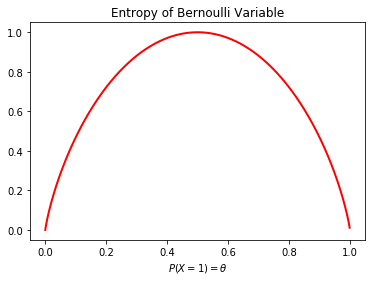

In [3]:
#For which theta do we achieve maximum and minimum entropy? Why?

© Olaf Wied 2018 

Part II - Latent Variable Models and the EM Algorithm
#### Entropy

This makes intuitive sense. If the probability of heads or tails is 1, there is no uncertainty about the result of the next coin flip. The uncertainty is maximal when both outcomes are equally likely for $\theta = 0.5$.


From an information theory background, $\log_2$ is a natural choice. We saw above that a fair coin toss has an entropy of 1. Similarly, $n$ (fair) coin tosses have an entropy of $n$ bits. Note that rare events have lower entropy because they are less "surprising" and carry less information.

© Olaf Wied 2018 

Part II - Latent Variable Models and the EM Algorithm
#### KL divergence

$$\mathbb{KL}(q||p) \mathrel{\vcenter{:=}} \mathbb{E}_q \log\frac{q(x)}{p(x)} = \int{q(x)\log\frac{q(x)}{p(x)} dx} \, \text{ or (in the discrete case) } \, \sum_{n=1}^N q(x_n) \log\frac{q(x_n)}{p(x_n)} $$

Note that the KL divergence is **not symmetric** and $q$ and $p$ have to be **defined over the same domain**!

If we define the **cross-entropy** as $\mathbb{H}(q,p) \mathrel{\vcenter{:=}} - \mathbb{E}_q \log p(x)$ we can decompose the KL divergence into two parts:

$$\mathbb{KL}(q||p) \mathrel{\vcenter{:=}} \mathbb{E}_q \log\frac{q(x)}{p(x)} = \mathbb{E}_q \log q(x) - \mathbb{E}_q \log p(x)= -\mathbb{H}(q) + \mathbb{H}(q,p)$$

© Olaf Wied 2018 

Part II - Latent Variable Models and the EM Algorithm
#### KL divergence

We can **interpret** this difference between cross-entropy and entropy **as the number of extra bits** needed to describe the data coming from distribution $q$ when we use $p$ instead of the true distribution $q$.

Applying **Jensen's inequality** to the logarithm, one can easily show that **the KL divergence is non-negative**. (This should make sense if we keep in mind the *extra* bit interpretation.)

Now, remembering our goal of approximating one distribution with another, what would be the **effect of minimizing the KL divergence with respect to $q$**? 

From the definition $\int{q(x)\log\frac{q(x)}{p(x)} dx}$ we can see that the approximation needs to be particularly good where $q(x)$ has large values!

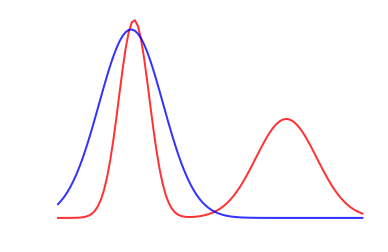

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

fig, ax = plt.subplots(1, 1)

x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)
x3 = np.linspace(-10,10,100)
y1 = norm.pdf(x1, loc=5, scale=2)
y2 = norm.pdf(x2, loc=-5, scale=1)
y3 = norm.pdf(x3, loc=-5.2, scale=2.1)

ax.plot(x1, 0.5*y1+0.5*y2, 'r-', lw=2,alpha=0.8)
ax.plot(x3,y3, 'b-', lw=2,alpha=0.8)
#ax.set_xlabel(r"$P(X=1) = \theta$")
#ax.set_title("Entropy of Bernoulli Variable")
plt.axis('off')
plt.show()

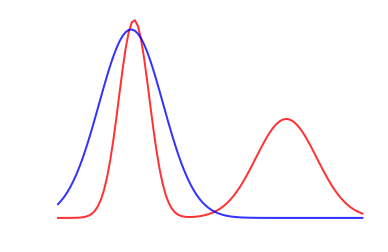

In [26]:
#Minimize KL(q||p) w.r.t. q: What if p=blue? What if p=red?

© Olaf Wied 2018 

Part II - Latent Variable Models and the EM Algorithm

# Latent Variable Models

#### Motivation
A central part of probabilistic modeling is the question of how to define the joint distribution $p(X|\theta)$ in the non-trivial case of correlated variables (say pixels in an image). One main approach to tackling this problem are **graphical models** (e.g. Bayes belief networks). In graphical models we achieve computational efficiency by introducing conditional independence relations between variables (these are basically the missing edges between nodes in a graph).

A second approach are **Latent Variable Models (LVM)**, which we discuss in this (and also following) part(s). 

LVMs "abstract away" correlations by assuming a common (hidden) cause and introducing a corresponding hidden (latent) variable.

© Olaf Wied 2018 

Part II - Latent Variable Models and the EM Algorithm

#### Motivation

LVMs can be hard to fit because hidden, unobservable variables pose their own challenges. However, they have the advantage that introducing latent variables can dramatically reduce the total number of parameters in a model! 

By compressing correlations between variables into a latent variable, LVMs can achieve compact representations of the data. This is the basis for models like Probabilistic PCA (see Part III for more details and a continuation of the ideas in Part II).

© Olaf Wied 2018 

Part II - Latent Variable Models and the EM Algorithm

#### Examples

Popular Latent Variable Models include 

- **Mixture Models** (next section)
- [**Latent Dirichlet Allocation**](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation)
- **Probabilisitic PCA** and ICA (Part III)

© Olaf Wied 2018 

Part II - Latent Variable Models and the EM Algorithm

# Mixture Models
#### Definition

Mixture Models are simple forms of LVM and therefore good candidates to explain the inference in LVMs.

For now, we assume a discrete latent variable, even though a continuous mixture of variables is encountered in many models, in particular for representation learning, as we will see in later chapters.

A (discrete) mixture model is a convex combination of $K$ **base distributions** where the latent variable $z_i \in \{1,\ldots,K\}$ indicates from which of the distributions $x_i$ was generated.
    
$$p(x_i|\theta) = \sum_{k=1}^K p(z_i=k) \cdot p(x_i|z_i=k)$$

The prior $p(z_i)$ follows a simple categorical distribution i.e. $\sum_{k=1}^K p(z_i=k)=1 \text{ and } p(z_i=k)\geq 0$.

© Olaf Wied 2018 

Part II - Latent Variable Models and the EM Algorithm

#### Applications

Mixture models can be used for multiple purposes such as **density estimation**, e.g. to build a **generative classifier** where the class-conditional distributions $p(x_i|z_i=class_k)$ are given by a mixture distribution.

Mixture models can also be used for **clustering** by estimating the posterior probability $p(z_i=cluster_k|x_i,\theta)$ that $x_i$ belongs the cluster $k$.

© Olaf Wied 2018 

Part II - Latent Variable Models and the EM Algorithm

#### Applications
The two applications are identical models with the **only difference** that, for clustering, we do not observe $z_i$ **during training**!

If the parameters are known (or the model is trained\*) we can compute the posterior probability of $x_i$ belong to cluster $k$ using the Bayes' theorem (see Part I):

$$ p(z_i=k|x_i,\theta) = \frac{p(z_i=k|\theta)\cdot p(x_i|z_i=k,\theta)}{\sum_{l=1}^K p(z_i=l|\theta)\cdot p(x_i|z_i=l,\theta)}$$


\*We will discuss *parameter estimation* in the next section in the context of Gaussian Mixtures.

© Olaf Wied 2018 

Part II - Latent Variable Models and the EM Algorithm

# Gaussian Mixture Model
#### Definition

If the base distributions are assumed to be Gaussian with mean $\mu_k \text{ and covariance } \Sigma_k$, we speak of a Gaussian Mixture Model or GMM for short

$$\Rightarrow p(x_i|\theta) = \sum_{k=1}^K p(z_i=k) \mathcal{N}(x_i|\mu_k,\Sigma_K)$$

Increasing the number $K$ of mixtures we can approximate any density, but will encounter computational difficulties quickly.

To fit the model, we need to estimate the parameters $\theta = \{\mu_k, \Sigma_k, \pi_k\}^{k=1,\ldots,K}$, with $\pi_k = p(z_i = k)$.

© Olaf Wied 2018 

Part II - Latent Variable Models and the EM Algorithm

#### Parameter Estimation

Parameter estimation using maximum-likelihood is usually straight-forward when we have complete data. It is much trickier when have missing or hidden variables.

The **Expectation-Maximimization (EM)** algorithm is a simple iterative algorithm to optimize parameters while enforcing necessary constraints (such as positive definiteness for coavariance matrics etc., which is more difficult to do using methods like gradient descent).

© Olaf Wied 2018 

Part II - Latent Variable Models and the EM Algorithm

#### Parameter Estimation

We would like to be able to maximize the log-likelihood 

$$l(\theta) = \sum_{n=1}^N \log p(x_n|\theta) = \sum_{n=1}^N \log \left(\sum_{z_n} p(x_n,z_n|\theta)\right)$$

The $\log$ of the sum makes our life difficult. EM to the rescue!

First define the **complete data log-likelihood**

$$l_c(\theta) \mathrel{\vcenter{:=}} \sum_{n=1}^N \log p(x_n, z_n|\theta)$$

Since we don't observe $z_n$, we cannot compute it. If we were to observe it though, it would be easy to maximize the likelihood!

© Olaf Wied 2018 

Part II - Latent Variable Models and the EM Algorithm

#### The EM algorithm

The idea of the EM algorithm now is to **alternate** between 

1. **E-step**: inferring the hidden values (starting with some initial parameters) and 
2. **M-step**: optimizing the parameters using the computed values for the hidden variables!

We will show this idea now in action for the Gaussian Mixture Model before we discuss the general EM algorithm and its convergence in more detail in the next section.

In [154]:
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt

### GENERATE SOME DATA ###

np.random.seed(0)
N = 100
#true parameters of generating distributions
mu1 = np.array([-1.5,-1.5])
cov1 = np.array([[1.0, 0.75],[0.75,1.0]])
mu2 = np.array([1.5,1.5])
cov2 = np.array([[1.0, -0.25],[-0.25,1.0]])
#generate data
c1 = np.array([multivariate_normal.rvs(mean=mu1, cov=cov1) for _ in range(N)]) #cluster 1
c2 = np.array([multivariate_normal.rvs(mean=mu2, cov=cov2) for _ in range(N)]) #cluster 2
#combined data (hidden cluster labels)
data = np.vstack([c1,c2])

In [170]:
from matplotlib.colors import to_rgba_array
blue,red = to_rgba_array(['blue','red'])
cluster_colors = np.array([0.5*blue+0.5*red]*(2*N)) #add the cluster colors based on the mixing distribution

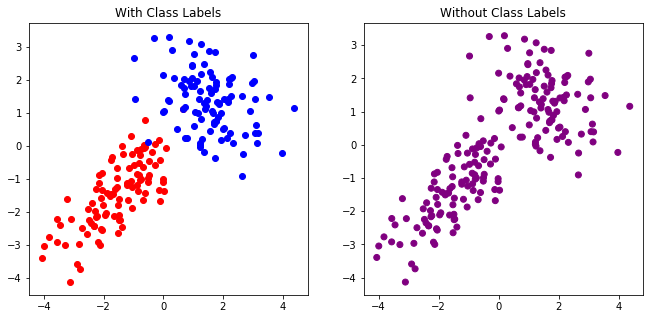

In [156]:
fig, ax = plt.subplots(1, 2, figsize = (11,5))
ax[0].scatter(c1[:,0],c1[:,1],c='r')
ax[0].scatter(c2[:,0],c2[:,1],c='b')
ax[0].set_title("With Class Labels")
ax[1].scatter(data[:,0],data[:,1],c=cluster_colors)
ax[1].set_title("Without Class Labels")
plt.show()

In [157]:
# Let's define some (pretty bad) initial parameters
a = [0.5,0.5]                     #the mixing parameter
m = [np.array([-2,2]),            #the mean vector
     np.array([2,-2])]
S = [np.array([[1.0, 0.0],[0.0,1.0]]), #the covariance matrices
     np.array([[1.0, 0.0],[0.0,1.0]])]

In [202]:
def get_ellipsoid_from_cov(cov,m,ax,color):
    from matplotlib.patches import Ellipse
    
    w,v, = np.linalg.eig(cov)
    i0 = np.argmax(w)
    i1 = np.argmin(w)
    w_max = 2.355*np.sqrt(w[i0]) #~ about 50% confidence interval
    w_min = 2.355*np.sqrt(w[i1])
    v_max = v[i0]
    v_min = v[i1]
    angle = np.arctan2(v_max[1],v_max[0])
    
    if(angle < 0):
        angle = angle + 2*np.pi;
    angle = np.degrees(angle)
    e = Ellipse(xy = m, width=w_min, height=w_max, angle=angle)
    e.set_alpha(0.85)
    e.set_edgecolor(color)
    e.set_fill(False)
    e.set_linewidth(2)
    ax.add_artist(e)

In [216]:
def plot_e_step(colors,m,S):
    fig, ax = plt.subplots(1, 1, figsize = (5,5))
    ax.scatter(data[:,0],data[:,1],c=colors)
    get_ellipsoid_from_cov(S[0],m[0],ax,'b')
    get_ellipsoid_from_cov(S[1],m[1],ax,'r')
    plt.show()

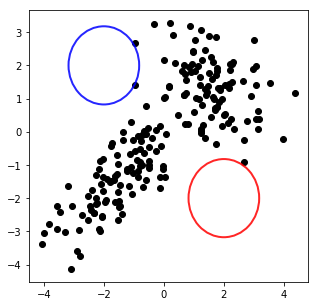

In [217]:
plot_e_step('k',m,S) # before the first E-step performed

© Olaf Wied 2018 

Part II - Latent Variable Models and the EM Algorithm

#### E-Step

Remember the formula for mixture models?

$$ p(z_i=k|x_i,\theta_{t-1}) = \frac{p(z_i=k|\theta_{t-1})\cdot p(x_i|z_i=k,\theta_{t-1})}{\sum_{l=1}^K p(z_i=l|\theta_{t-1})\cdot p(x_i|z_i=l,\theta_{t-1})}$$

This is it! This is the E-step for any mixture model!

Let's perform one E-step with our initial parameters... 

We will use the following notation:

$$r_{ik} = p(z_i=k|x_i,\theta_{t-1})$$ 

is sometimes called the **responsibility** of cluster $k$ for point $i$.

In [204]:
def r(x,mu,cov,a,k):
    return a[k]*multivariate_normal.pdf(x, mean=m[k], cov=cov[k]) / \
                (a[0]*multivariate_normal.pdf(x, mean=m[0], cov=cov[0]) +\
                 a[1]*multivariate_normal.pdf(x, mean=m[1], cov=cov[1]))

In [211]:
cluster_probs = r(data,m,S,a,0) #we only need to calculate r0 because r1 = (1-r0)
cluster_colors = np.clip(np.array([prob_blue*blue + (1-prob_blue)*red \
                                   for prob_blue in cluster_probs]),0.0,1.0) 

#we clip the values to be within 0-1 range to avoid rounding erros 
#that can lead to invalid RGB colors

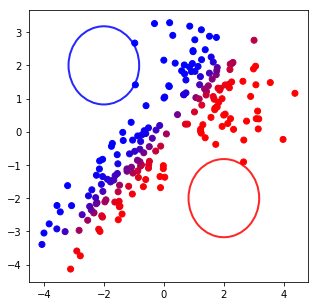

In [218]:
plot_e_step(cluster_colors,m,S)

© Olaf Wied 2018 

Part II - Latent Variable Models and the EM Algorithm

#### E-Step

Note that the E-Step gives us **soft clusters** because we assign each cluter a probability. Points with greater uncertainty therefore are shown as a mix of red and blue (purple).

This is different from, say, K-Means which performs **hard clustering**. In fact, **K-Means** is a special case of the Gaussian Mixture Model for clustering:

K-Means can be recovered from the GMM algorithm by fixing the covariance matrices to a constant diagonal and keeping the mixing parameters equal at $\frac{1}{K}$. Now, all we need to estimate are the cluster centroids.

© Olaf Wied 2018 

Part II - Latent Variable Models and the EM Algorithm

#### M-Step

Let us return to our GMM example. Given our new cluster assignments, let us now update our parameter estimates.

We can estimate our mixing parameters by simply calculating the proportion of blue and red points weighted by $r_{ik}$ (*how blue or red they are*). In other words, we calculate the average responsibility of the "blue cluster" and the "red cluster":

$$ \pi_k = p(z_i=k) = \frac{1}{N}\sum_{i=1}^N r_{ik}$$

Next, let us derive the updated estimates for $\mu$ and $\Sigma$.